IMPORT NECESSARY LIBRARIES

In [62]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

LOAD DATA

In [63]:
# Loading the diabetes dataset 
df = pd.read_csv('./datasets/datasets.csv')

PREPROCESS DATA

In [64]:
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [65]:
# Preprocessing data
df.rename(columns={'6':'Pregnancies','148':'Glucose','72':'BloodPressure','35':'SkinThickness','0':'Insulin','33.6':'BMI','0.627':'DiabetesPedigreeFunction','50':'Age','1':'Outcome'
},inplace=True)

In [66]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
df['Outcome'].value_counts()

Outcome
0    500
1    267
Name: count, dtype: int64

VISUALIZE DATA

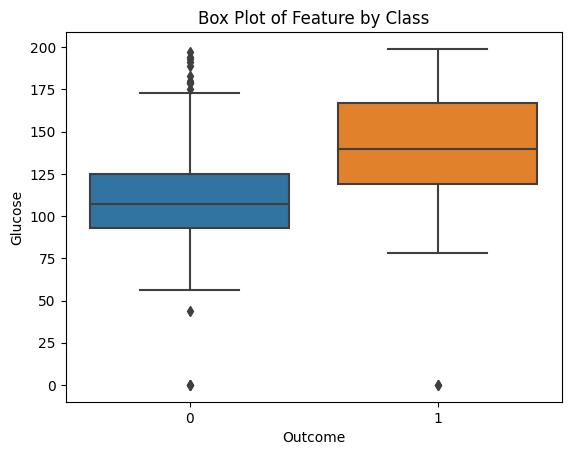

In [69]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataframe 'df' should be defined before this point

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your seaborn code
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Box Plot of Feature by Class')
plt.show()

# We can see that high glucose means higher chances of diabetes

c:\Users\abhik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


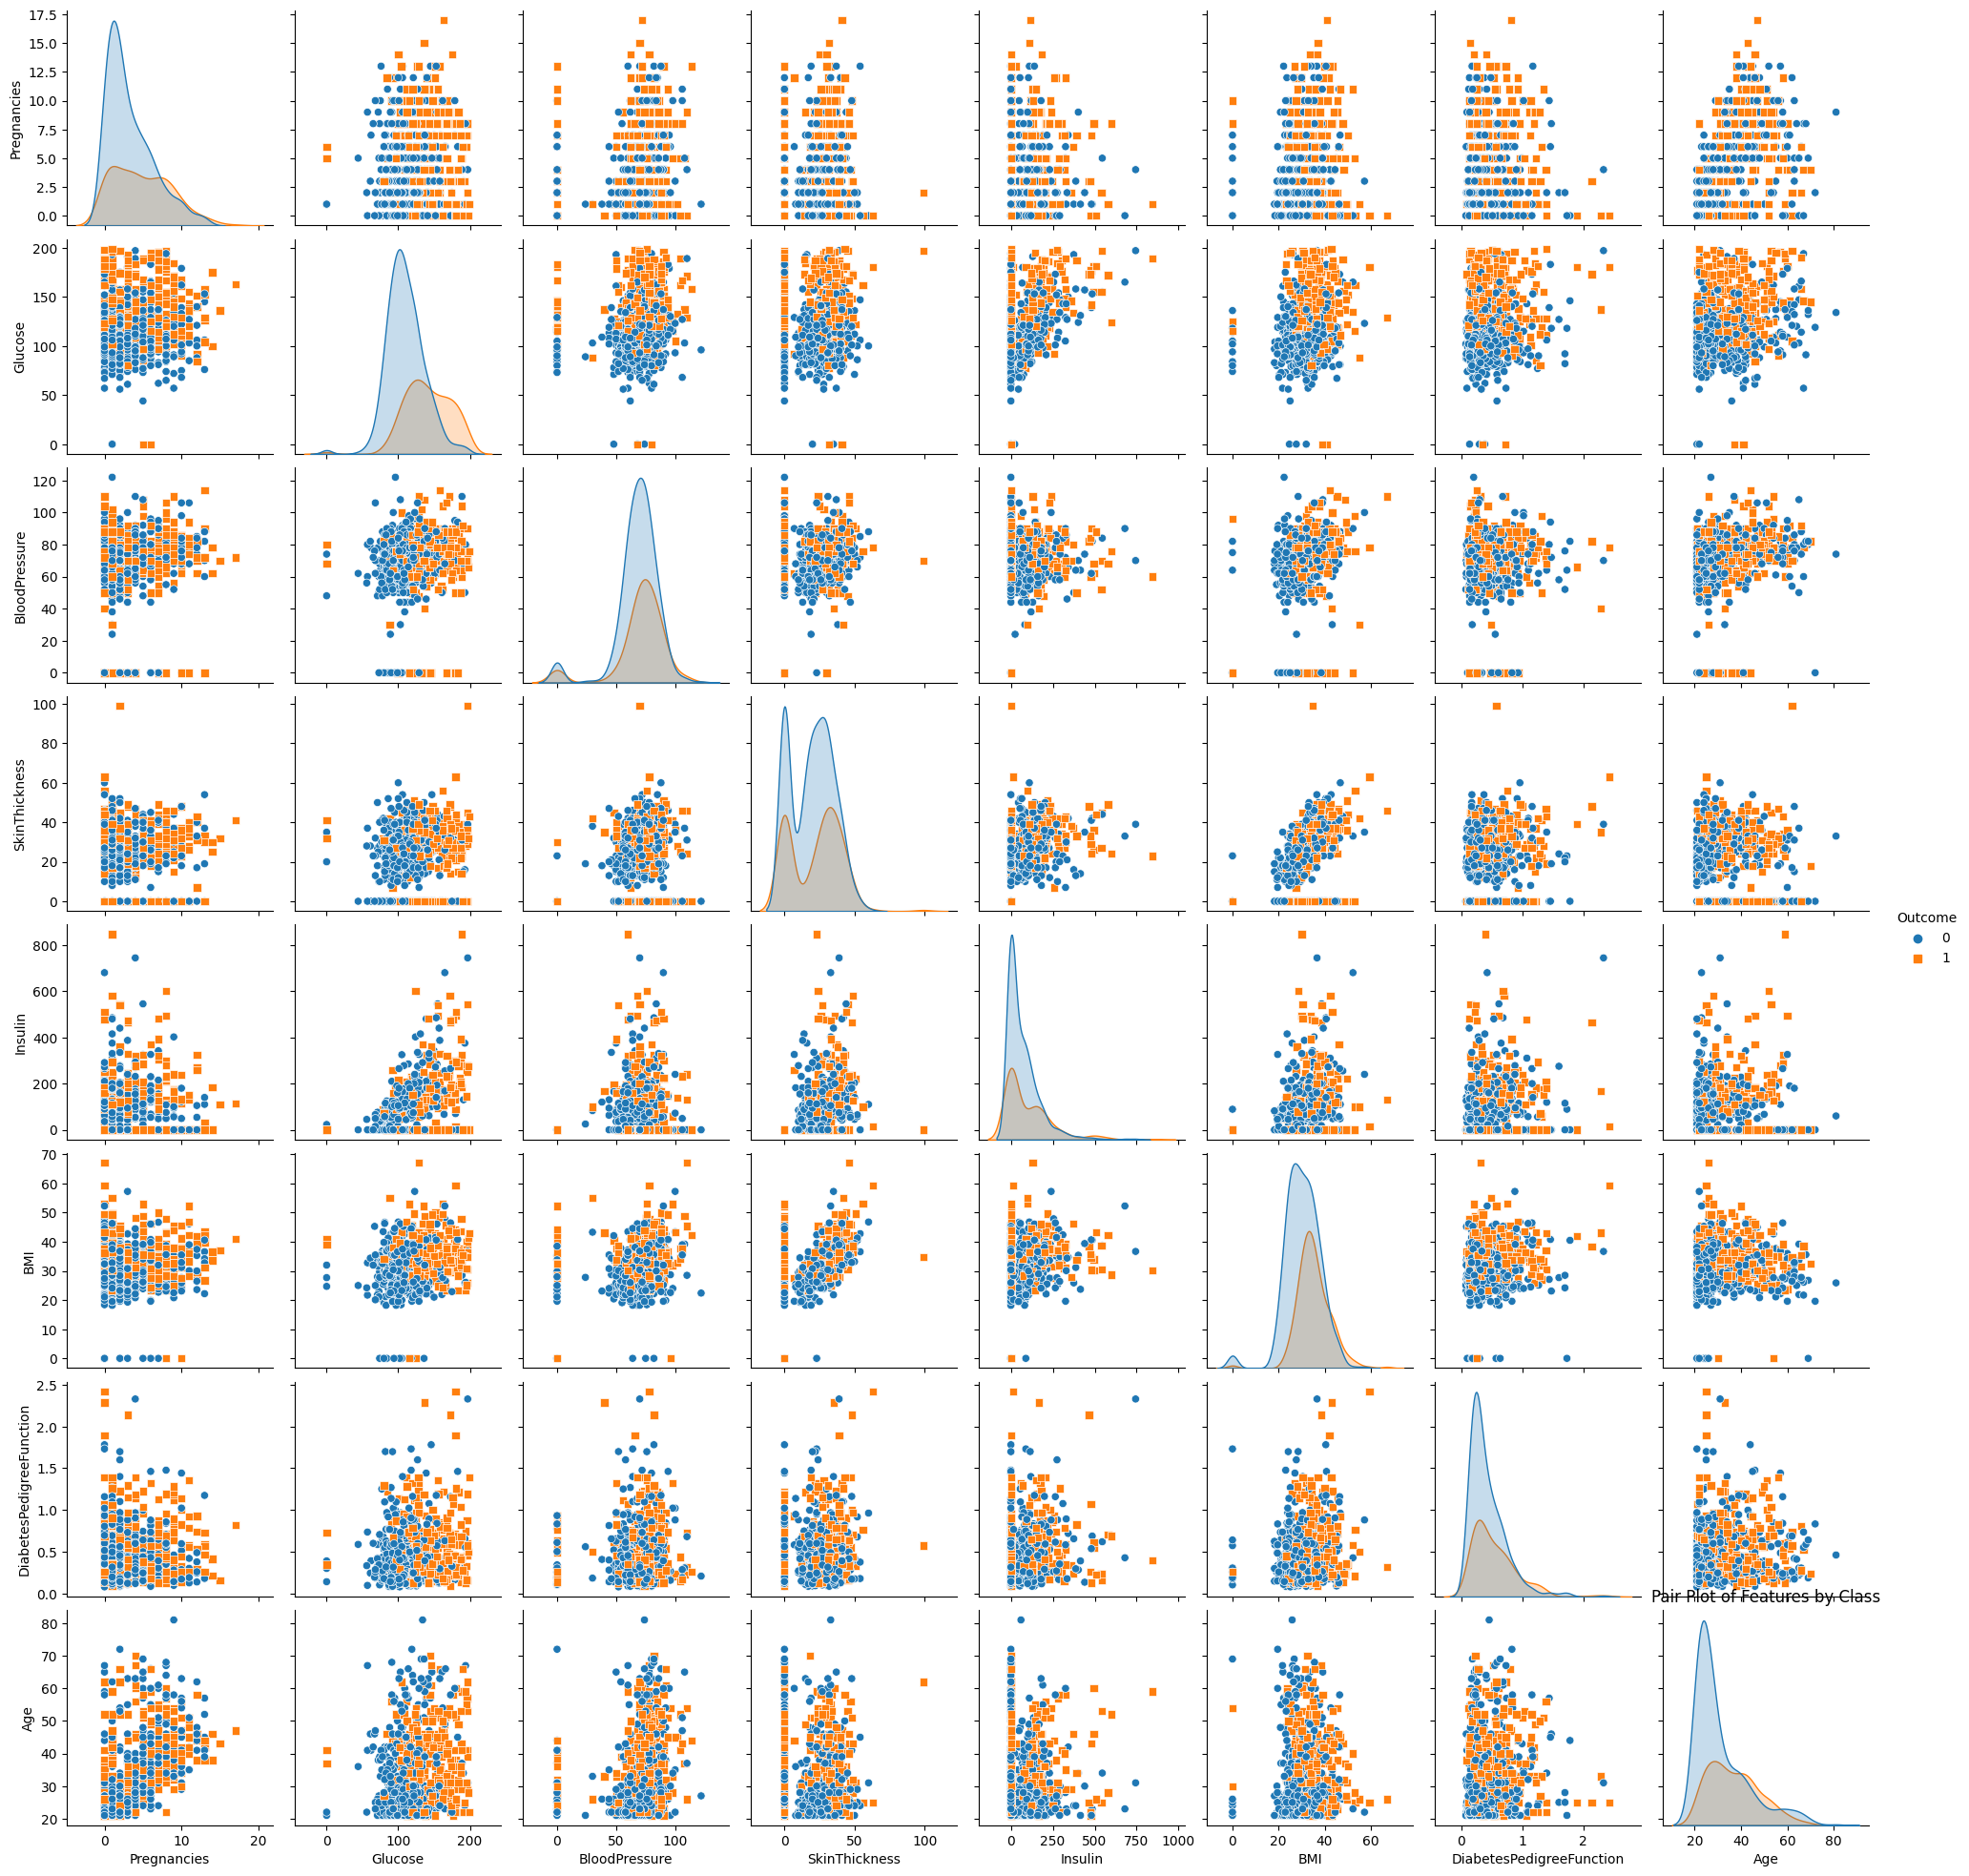

In [70]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataframe 'df' should be defined before this point

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your seaborn code
sns.pairplot(df, hue='Outcome', markers=["o", "s"])
plt.title('Pair Plot of Features by Class')
plt.show()



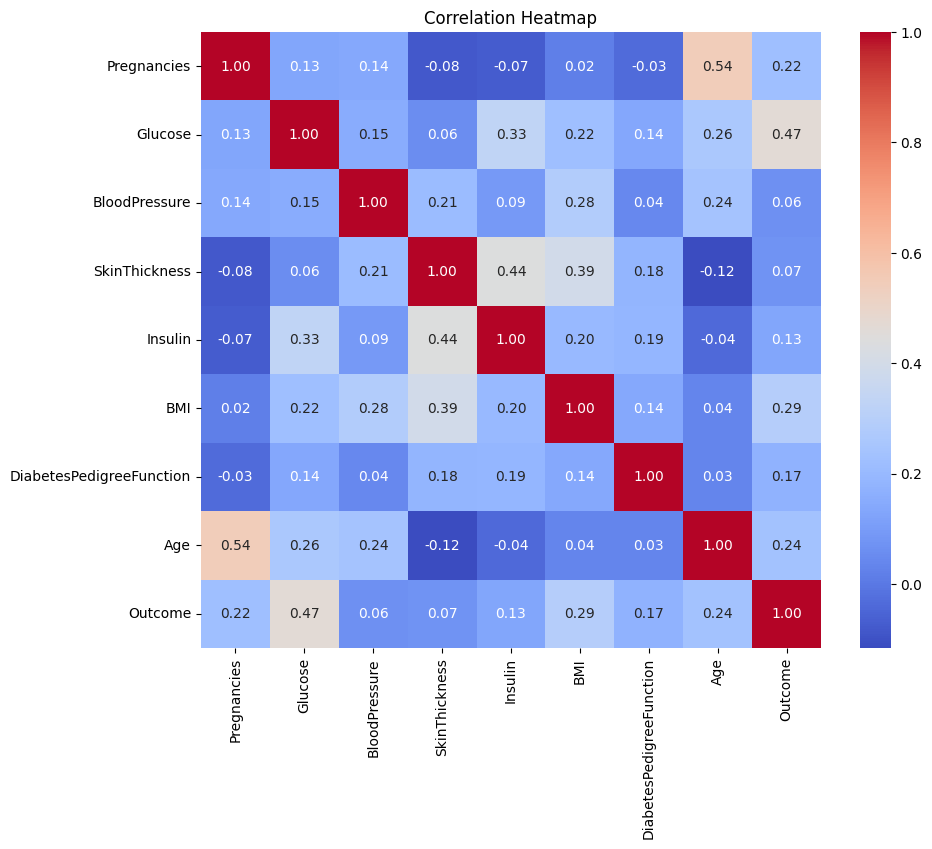

In [71]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


FEATURE SELECTION

In [72]:
# Split data into features (X) and target (y)
X = df.drop('Outcome', axis='columns')  # 'Outcome' is the target variable
y = df['Outcome']

In [73]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [74]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: Outcome, Length: 767, dtype: int64

SPLIT THE DATA INTO TRAINING PART AND TESTING PART

In [75]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20)

SCALE THE DATA

In [76]:
# Feature scaling (normalize the data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

DEFINE CLASSIFIERS

In [77]:
# Defining a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
}

TRAIN CLASSIFIER

In [78]:
# Train and evaluate each classifier
results = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep
    }

PRINT RESULTS

In [79]:
# Print results for each classifier
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("=" * 40)

# Find the best-performing model
best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"The best-performing model is: {best_model} with accuracy {results[best_model]['Accuracy']:.4f}")


Classifier: Logistic Regression
Accuracy: 0.8377
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       100
           1       0.85      0.65      0.74        54

    accuracy                           0.84       154
   macro avg       0.84      0.79      0.81       154
weighted avg       0.84      0.84      0.83       154

Classifier: Decision Tree
Accuracy: 0.7013
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

Classifier: Random Forest
Accuracy: 0.7922
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.74      0.63

VISUALIZE RESULTS

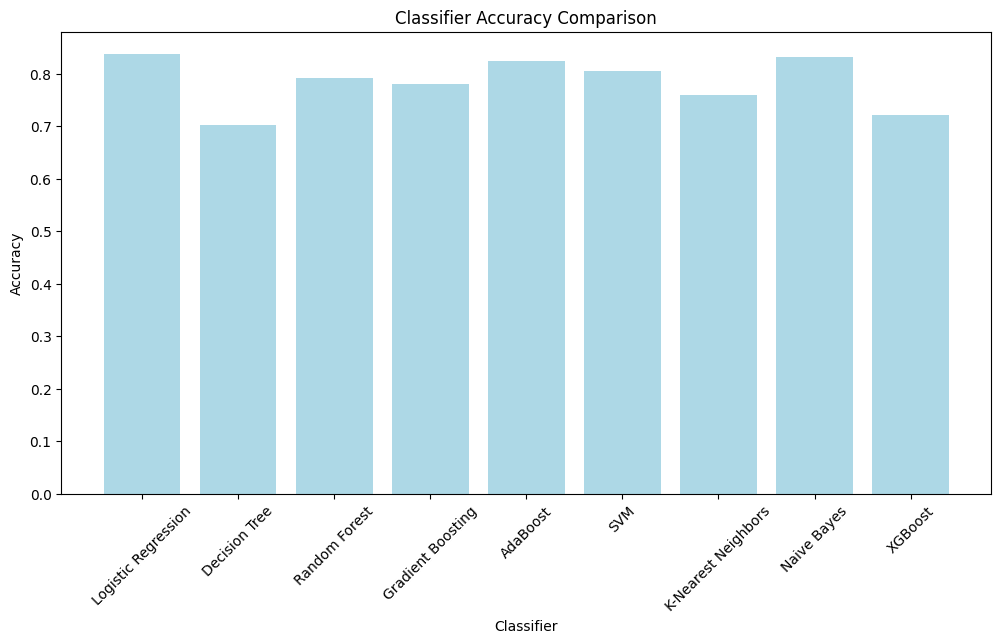

In [80]:
import matplotlib.pyplot as plt

accuracy_scores = [results[classifier]["Accuracy"] for classifier in classifiers.keys()]
classifier_names = classifiers.keys()

plt.figure(figsize=(12, 6))
plt.bar(classifier_names, accuracy_scores, color='lightblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


SVM does not support probability estimates and will not generate ROC curves.


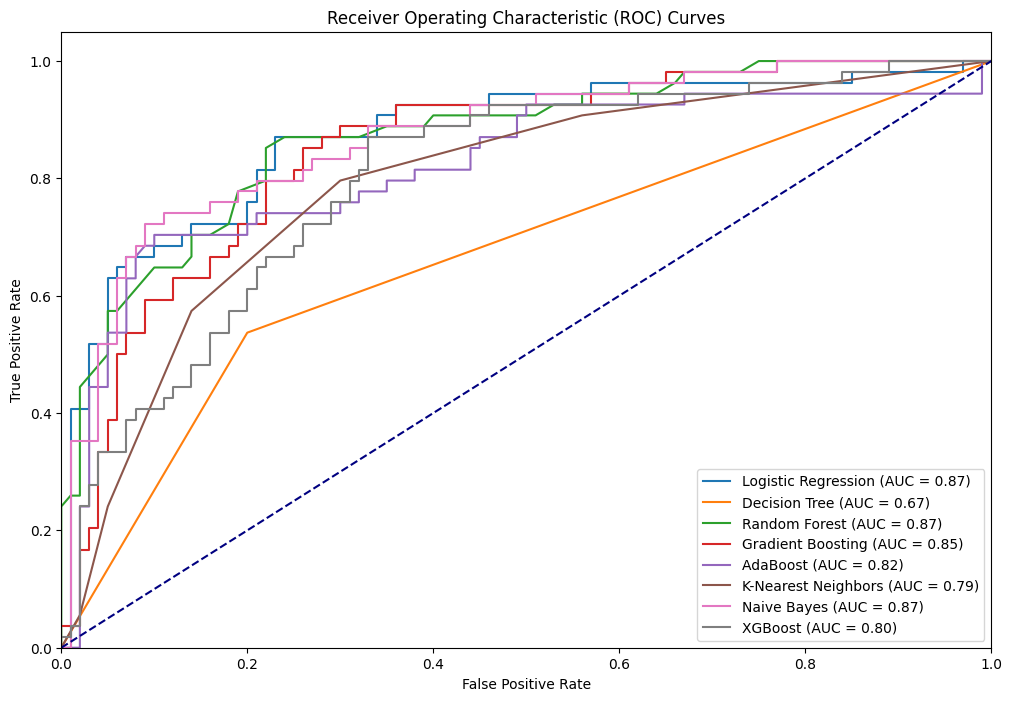

In [81]:
from sklearn.metrics import roc_curve, auc

# Initialize an empty dictionary to store ROC data
roc_data = {}

for name, classifier in classifiers.items():
    # Check if the classifier supports probability estimates
    if hasattr(classifier, "predict_proba"):
        classifier.probability = True  # Enable probability estimates
    else:
        print(f"{name} does not support probability estimates and will not generate ROC curves.")
        continue

    classifier.fit(X_train, y_train)
    y_scores = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Store ROC data in the dictionary
    roc_data[name] = {
        "fpr": fpr,
        "tpr": tpr,
        "roc_auc": roc_auc
    }

# Create ROC plots for each classifier
plt.figure(figsize=(12, 8))
for name, data in roc_data.items():
    plt.plot(data["fpr"], data["tpr"], label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

PREDICTION

In [82]:
from collections import Counter

# Input data for prediction
# user_input_data = []

# Prompt the user to enter values for each feature
# for feature_name in X.columns:
#     value = float(input(f"Enter the value for {feature_name}: "))
#     user_input_data.append(value)

user_input_data = [6,148,72,35,0,33.6,0.627,50] # sample input data

# Standardize the user input data using the same scaler
input_data = scaler.transform([user_input_data])

# Make predictions using each classifier on the input data
all_predictions = [classifier.predict(input_data) for classifier in classifiers.values()]

# Count the most common prediction among the models for the input data
predictions_for_input = [pred[0] for pred in all_predictions]
most_common_prediction = Counter(predictions_for_input).most_common(1)[0][0]

if most_common_prediction == 0:
    print("Non-Diabetic person")
else:
    print("Diabetic Person")


Diabetic Person


c:\Users\abhik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
